In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
stress=pd.read_csv("https://github.com/sukhioo7/dataset/blob/main/Stress-Lysis.csv?raw=true")

In [14]:
stress.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [15]:
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [16]:
stress.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [17]:
unique_values = stress['Stress Level'].unique()

In [18]:
unique_values

array([1, 2, 0], dtype=int64)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


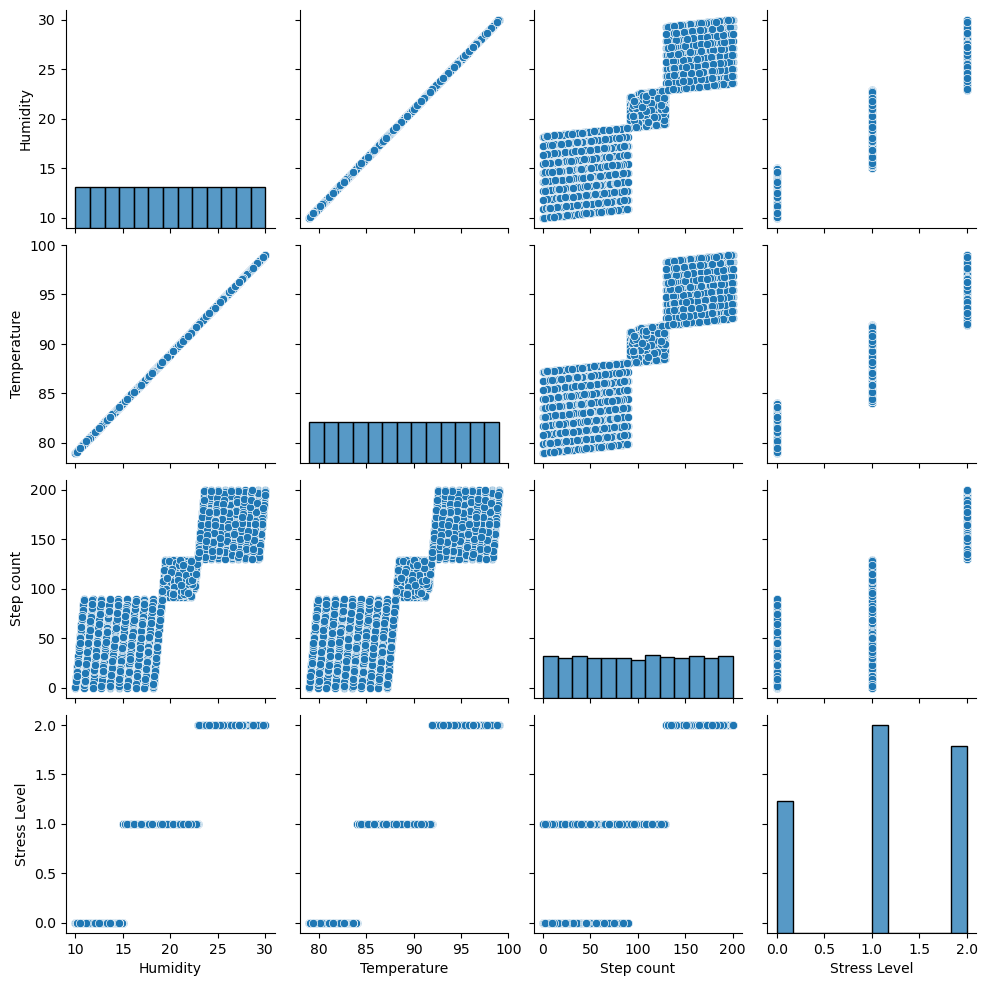

In [20]:
sns.pairplot(stress)
plt.show()

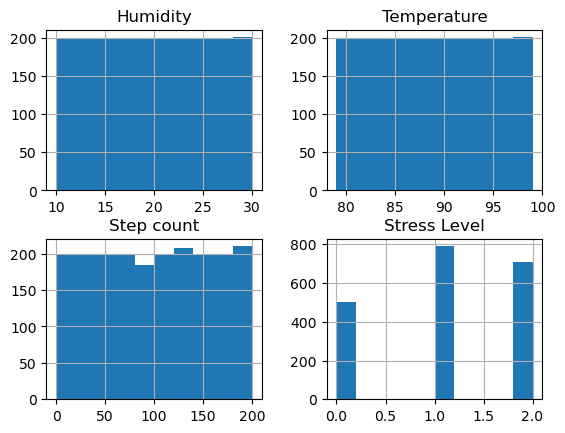

In [21]:
stress.hist()
plt.show()

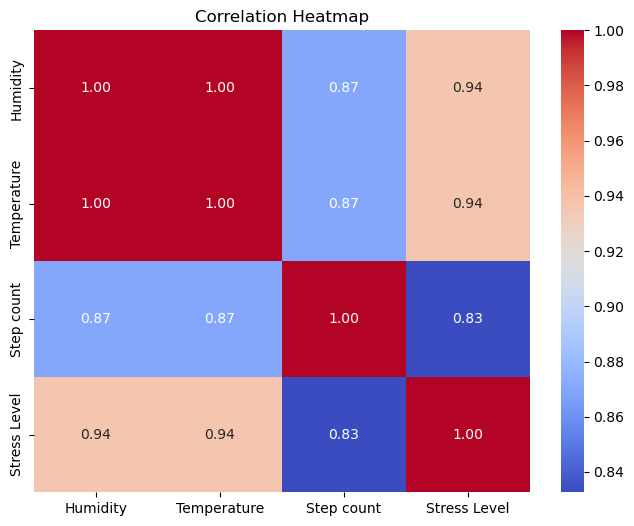

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(stress.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
X=stress.drop("Stress Level",axis=1)
Y=stress['Stress Level']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()
lr.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
Y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [41]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



In [50]:
import joblib

joblib.dump(lr, 'logistic_regression_model.pkl')

# Load the model
model = joblib.load('logistic_regression_model.pkl')
 

In [54]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

In [66]:
root = tk.Tk()
root.title("Stress Level Classifier")
root.geometry('200x150') 

# Function to classify stress level
def classify():
    # Get values from entry fields
    humidity = float(humidity_entry.get())
    temperature = float(temp_entry.get())
    step_count = int(step_entry.get())
    
    # Predict stress level class
    stress_level_class = model.predict([[humidity, temperature, step_count]])
    
    # Show result
    result_label.config(text=f"Predicted Stress Level Class: {stress_level_class}")

# Create and place widgets
ttk.Label(root, text="Humidity:").grid(row=0, column=0, padx=5, pady=5)
humidity_entry = ttk.Entry(root)
humidity_entry.grid(row=0, column=1, padx=5, pady=5)

ttk.Label(root, text="Temperature:").grid(row=1, column=0, padx=5, pady=5)
temp_entry = ttk.Entry(root)
temp_entry.grid(row=1, column=1, padx=5, pady=5)

ttk.Label(root, text="Step count:").grid(row=2, column=0, padx=5, pady=5)
step_entry = ttk.Entry(root)
step_entry.grid(row=2, column=1, padx=5, pady=5)

classify_button = ttk.Button(root, text="Classify", command=classify)
classify_button.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

result_label = ttk.Label(root, text="")
result_label.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

root.mainloop()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
